In [7]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [8]:
# Directories - Change as desired
bca_file_path = "C:/Users/plutzer/Box/CellBio-MajorLab/Users/Isaac/Lab Notebook/Lab_data/BCA_IBP_20210721_132654.xlsx"
figure_base = bca_file_path[:len(bca_file_path)-5]
expt_name = bca_file_path.split('/')[-1].split('.')[0]

In [9]:
# load file
df = pd.read_excel(bca_file_path,header=11)
df = df.set_index('Unnamed: 0')
mat = df.to_numpy()
df.index.names = [' ']
df

,1,2,3,4,5,6,7,8,9,10,11,12
,,,,,,,,,,,,
A,1.741,1.649,1.104,0.295,0.236,0.232,NaN,NaN,NaN,NaN,NaN,NaN
B,0.930,0.866,0.807,0.281,0.223,0.196,NaN,NaN,NaN,NaN,NaN,NaN
C,0.708,0.572,0.766,0.197,0.197,0.186,NaN,NaN,NaN,NaN,NaN,NaN
D,0.492,0.413,0.480,0.239,0.200,0.189,NaN,NaN,NaN,NaN,NaN,NaN
E,0.367,0.377,0.314,0.195,0.192,0.212,NaN,NaN,NaN,NaN,NaN,NaN
F,0.246,0.233,0.235,0.268,0.210,0.187,NaN,NaN,NaN,NaN,NaN,NaN
G,0.176,0.154,0.164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,0.080,0.090,0.091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Plate setup

# Standards go in the first n cols, using all the rows as shown below
row_order = ['A','B','C','D','E','F','G','H']

##### STANDARDS - listed in ug/mL ##### 
standards = {
    'A':2000,
    'B':1500,
    'C':1000,
    'D':750,
    'E':500,
    'F':250,
    'G':125,
    'H':0
}

# Add standards to ignore if you have some outliers
# ignore = ['A']
ignore = []

# Change if needed
num_standard_reps = 3

# Positions of samples
samples_positions = [
    [[0,3],[0,4],[0,5]],
    [[1,3],[1,4],[1,5]],
    [[2,3],[2,4],[2,5]],
    [[3,3],[3,4],[3,5]],
    [[4,3],[4,4],[4,5]],
    [[5,3],[5,4],[5,5]]
]

# Sample names corresponding to the above positions
samples_names = [
    '100',
    '50',
    '25',
    '10',
    '1',
    '0'
]

Linear model:   A=0.0006520747028862479[protein]+0.04471363893604979
100:
	Mean Absorbance: 0.2543333333333333
	Interpolated Concentration: 321.465766835385  ug/mL
50:
	Mean Absorbance: 0.2333333333333333
	Interpolated Concentration: 289.26086775396277  ug/mL
25:
	Mean Absorbance: 0.19333333333333336
	Interpolated Concentration: 227.9182028369681  ug/mL
10:
	Mean Absorbance: 0.20933333333333334
	Interpolated Concentration: 252.455268803766  ug/mL
1:
	Mean Absorbance: 0.19966666666666666
	Interpolated Concentration: 237.63079144882556  ug/mL
0:
	Mean Absorbance: 0.22166666666666668
	Interpolated Concentration: 271.36925715317267  ug/mL


Text(0, 0.5, 'Net Absorbance (562nm)')

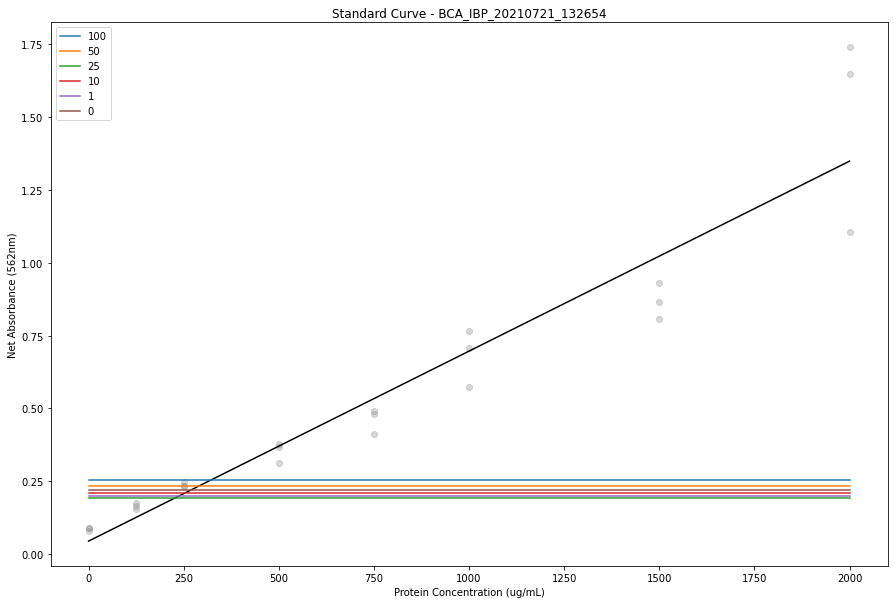

In [11]:
# Generate points for the standard curve
concentrations_x = []
absorbances_y = []
for row in range(len(row_order)):
    if row_order[row] not in ignore:
        concentration = standards[row_order[row]]
        for col in range(num_standard_reps):
            concentrations_x.append(concentration)
            absorbances_y.append(mat[row,col])

# Scatterplot of points
std_curve = plt.figure(figsize = (15,10))
plt.scatter(concentrations_x,absorbances_y,c='grey',alpha=0.3)

# Add a linear regression
slope,intercept,r_val,pval,std_err = linregress(concentrations_x,absorbances_y)
plt.plot([0,2000],[intercept,intercept+slope*2000],c='black')
print('Linear model:   A=' + str(slope) + '[protein]' + '+' + str(intercept))

# Make interpolations for the samples
for samplenum in range(len(samples_positions)):
    sample_name = samples_names[samplenum]
    sample_abs = []
    for row,col in samples_positions[samplenum]:
        sample_abs.append(mat[row,col])
    # Get the mean absorbance and plot as a horizontal line
    plt.plot([0,2000],[np.mean(sample_abs)]*2,label=sample_name)
    print(sample_name + ':')
    print('\t' + 'Mean Absorbance: ' + str(np.mean(sample_abs)))
    print('\t' + 'Interpolated Concentration: ' + str((np.mean(sample_abs)-intercept)/slope) + '  ug/mL')

plt.legend()
plt.title('Standard Curve - ' + expt_name)
plt.xlabel('Protein Concentration (ug/mL)')
plt.ylabel('Net Absorbance (562nm)')

In [18]:
# Run this to save the figure
save_path = figure_base + '.png'
std_curve.savefig(save_path)

In [17]:
# Dilution
sample_conc = 2713.7
initial_vol = 46
target_conc = 2279.2

add = (sample_conc*(initial_vol) - target_conc*(initial_vol))/(target_conc)

print('Amount of water to add : ' + str(add))

Amount of water to add : 8.76930501930502
